<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300"></center><br/>

# Assignment: Notebook for Peer Assignment

Estimated time needed: 60 minutes


# Assignment Scenario

Congratulations! You have just been hired by a US Weather forecast firm as a data scientist.

The company is considering the weather condition to help predict the possibility of precipitations, which involves using various local climatological variables, including temperature, wind speed, humidity, dew point, and pressure. The data you will be handling was collected by a NOAA weather station located at the John F. Kennedy International Airport in Queens, New York.

Your task is to provide a high level analysis of weather data in JFK Airport. Your stakeholders want to understand the current and historical record of precipitations based on different variables. For now they are mainly interested in a macro-view of JFK Airport Weather, and how it relates to the possibility to rain because it will affect flight delays and etc.


# Introduction

This project relates to the NOAA Weather Dataset - JFK Airport (New York). The original dataset contains 114,546 hourly observations of 12 local climatological variables (such as temperature and wind speed) collected at JFK airport. This dataset can be obtained for free from the IBM Developer [Data Asset Exchange](https://developer.ibm.com/exchanges/data/all/jfk-weather-data/). 

For this project, you will be using a subset dataset, which contains 5727 rows (about 5% or original rows) and 9 columns. The end goal will be to predict the precipitation using some of the available features. In this project, you will practice reading data files, preprocessing data, creating models, improving models and evaluating them to ultimately choose the best model.




## Table of Contents:

Using this R notebook you will complete **10 tasks**:
* [0. Import Modules](#cell0)
* [1. Download and Unzip NOAA Weather Dataset](#cell1)
* [2. Read Dataset into Project](#cell2)
* [3. Select Subset of Columns](#cell3)
* [4. Clean Up Columns](#cell4)
* [5. Convert Columns to Numerical Types](#cell5)
* [6. Rename Columns](#cell6)
* [7. Exploratory Data Analysis](#cell7)
* [8. Linear Regression](#cell8)
* [9. Improve the Model](#cell9)
* [10. Find Best Model](#cell10)


<a id="cell0"></a>
## 0. Import required modules

Tidymodels is a collection of packages that use tidyverse principles to easily do the entire modeling process from preprocessing initial data, to creating a model, to tunning hyperparameters. The tidymodels packages can be used to produce high quality statistical and machine learning models. Our Jupyter notebook platforms have a built-in Tidyverse, Tidymodels and rlang packages so we do not need to install these packages prior to loading library. However, if you decide to run this lab on your RStudio Desktop locally on your machine, you can remove the commented lines of code to install these packages before loading.
 


**Note: After installing the packages, restart the kernel. Without installing the packages again, load them. Tidyverse and Tidymodels will be the two main packages you will use.**


In [1]:
# Library for modeling
library(tidymodels)

# Load tidyverse
library(tidyverse)

── Attaching packages ────────────────────────────────────── tidymodels 0.1.0 ──
✔ broom     0.5.6      ✔ recipes   0.1.12
✔ dials     0.0.6      ✔ rsample   0.0.5 
✔ dplyr     0.8.5      ✔ tibble    3.0.1 
✔ ggplot2   3.3.0      ✔ tune      0.1.0 
✔ infer     0.5.1      ✔ workflows 0.1.1 
✔ parsnip   0.1.0      ✔ yardstick 0.0.6 
✔ purrr     0.3.4      
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard()  masks scales::discard()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ ggplot2::margin() masks dials::margin()
✖ recipes::step()   masks stats::step()
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ stringr 1.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter


### Understand the Dataset

The original NOAA JFK dataset contains 114,546 hourly observations of various local climatological variables (including temperature, wind speed, humidity, dew point, and pressure). 

In this project you will use a sample dataset, which is around 293 KB. [Link to the sample dataset](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz).

The sample contains 5727 rows (about 5% or original rows) and 9 columns, which are:
- DATE
- HOURLYDewPointTempF
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYWETBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYSeaLevelPressure
- HOURLYStationPressure

The original dataset is much bigger. Feel free to explore the original dataset. [Link to the original dataset.](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa_weather.html) 

For more information about the dataset, checkout the [preview](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/data-preview/index.html?_ga=2.176781478.281508226.1616293518-1509963377.1616117067&cm_mc_uid=90945889198916153255549&cm_mc_sid_50200000=64650651616293516933) of NOAA Weather - JFK Airport.


<a id="cell1"></a>

## 1. Download NOAA Weather Dataset

Use the `download.file()` function to download the sample dataset from the URL below.

URL = 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'


In [2]:
# url where the data is located
URL <- 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'

# download the file
download.file(URL, destfile = "noaa-weather-sample-data.tar.gz")

Untar the zipped file.


In [3]:
# untar the file so we can get the csv only
# if you run this on your local machine, then can remove tar = "internal" 
untar("noaa-weather-sample-data.tar.gz", tar = "internal")

Warning message in untar2(tarfile, files, list, exdir, restore_times):
“using pax extended headers”

<a id="cell2"></a>
## 2. Extract and Read into Project
We start by reading in the raw dataset. You should specify the file name as "noaa-weather-sample-data/jfk_weather_sample.csv".


In [4]:
# read_csv
weather <- read_csv("noaa-weather-sample-data/jfk_weather_sample.csv",
                     col_types = cols('DivDistance' = col_number(), 
                                      'DivArrDelay' = col_number()))

Warning message:
“The following named parsers don't match the column names: DivDistance, DivArrDelay”Warning message:
“1 parsing failure.
 row                 col               expected actual                                              file
1443 HOURLYDewPointTempF no trailing characters      s 'noaa-weather-sample-data/jfk_weather_sample.csv'
”

Next, display the first few rows of the dataframe.


In [5]:
head(weather)

DATE,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYStationPressure
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2015-07-25 13:51:00,60,46,83,68,0.00,13,30.01,29.99
2016-11-18 23:51:00,34,48,53,44,0.00,6,30.05,30.03
2013-01-06 08:51:00,33,89,36,35,0.00,13,30.14,30.12
2011-01-27 16:51:00,18,48,36,30,0.00,14,29.82,29.80
2015-01-03 12:16:00,27,61,39,34,T,11,NA,30.50
2013-02-15 20:51:00,35,79,41,38,0.00,6,29.94,29.92


Also, take a `glimpse` of the dataset to see the different column data types and make sure it is the correct subset dataset with about 5700 rows and 9 columns.


In [7]:
glimpse(weather)

Rows: 5,727
Columns: 9
$ DATE                   <dttm> 2015-07-25 13:51:00, 2016-11-18 23:51:00, 201…
$ HOURLYDewPointTempF    <dbl> 60, 34, 33, 18, 27, 35, 4, 14, 51, 71, 76, 19,…
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44…
$ HOURLYWETBULBTEMPF     <dbl> 68, 44, 35, 30, 34, 38, 15, 21, 52, 72, 78, 35…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "T", "0.00", "…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17,…
$ HOURLYSeaLevelPressure <dbl> 30.01, 30.05, 30.14, 29.82, NA, 29.94, 30.42, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.4…


<a id="cell3"></a>
## 3. Select Subset of Columns

The end goal of this project will be to predict `HOURLYprecip` (precipitation) using a few other variables. Before you can do this, you first need to preprocess the dataset. Section 3 to section 6 focuses on preprocessing.

The first step in preprocessing is to select a subset of data columns and inspect the column types.

The key columns that we will explore in this project are:
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYStationPressure

Data Glossary:
- 'HOURLYRelativeHumidity' is the relative humidity given to the nearest whole percentage.
- 'HOURLYDRYBULBTEMPF' is the dry-bulb temperature and is commonly used as the standard air temperature reported. It is given here in whole degrees Fahrenheit.
- 'HOURLYPrecip' is the amount of precipitation in inches to hundredths over the past hour. For certain automated stations, precipitation will be reported at sub-hourly intervals (e.g. every 15 or 20 minutes) as an accumulated amount of all precipitation within the preceding hour. A “T” indicates a trace amount of precipitation.
- 'HOURLYWindSpeed' is the speed of the wind at the time of observation given in miles per hour (mph).
- 'HOURLYStationPressure' is the atmospheric pressure observed at the station during the time of observation. Given in inches of Mercury (in Hg).

`Select` those five columns and store the modified dataframe as a new variable.


In [8]:
weather_subset <- weather %>%
  select(HOURLYRelativeHumidity, HOURLYDRYBULBTEMPF, HOURLYPrecip, HOURLYWindSpeed, HOURLYStationPressure)

Show the first 10 rows of this new dataframe.


In [9]:
head(weather_subset, 10)

HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,T,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


<a id="cell4"></a>
## 4. Clean Up Columns

From the dataframe preview above, we can see that the column `HOURLYPrecip` - which is the hourly measure of precipitation levels - contains both `NA` and `T` values. `T` specifies *trace amounts of precipitation* (meaning essentially no precipitation), while `NA` means *not available*, and is used to denote missing values. Additionally, some values also have "s" at the end of them, indicating that the precipitation was snow. 

Inspect the unique values present in the column `HOURLYPrecip` (with `unique(dataframe$column)`) to see these values.


In [10]:
unique(weather_subset$HOURLYPrecip)

[1] "0.00"  "T"     "0.06"  NA      "0.03"  "0.02"  "0.08"  "0.01"  "0.07" 
[10] "0.16"  "0.09"  "0.22"  "0.02s" "0.24"  "0.18"  "0.05"  "0.04"  "0.09s"
[19] "0.11"  "0.14"  "0.25"  "0.10"  "0.01s" "0.58"  "0.12"  "0.13"  "0.46" 
[28] "1.07"  "1.19"  "0.34"  "0.20"  "0.36s" "0.42"  "0.17"  "0.27"  "0.35" 
[37] "0.31"  "0.33"  "0.23"  "0.26"  "0.28"  "0.75"  "0.19"  "0.36"  "0.03s"
[46] "0.07s" "0.54"  "0.59"  "0.21"

Having characters in values (like the "T" and "s" that you see in the unique values) will cause problems when you create a model because values for precipitation should be numerical. So you need to fix these values that have characters. 

Now, for the column `HOURLYPrecip`:
1. Replace all the `T` values with "0.0" and 
2. Remove "s" from values like "0.02s". In R, you can use the method `str_remove(column, pattern = "s$")` to remove the character "s" from the end of values. The "$" tells R to match to the end of values. The `pattern` is a regex pattern. Look at [here](https://www.rdocumentation.org/packages/stringi/versions/1.5.3/topics/about_search_regex) for more information about regex and matching to strings in R.

Remember that you can use `tidyverse`'s  `mutate()` to update columns.

You can check your work by checking if unique values of `HOURLYPrecip` still contain any `T` or `s`. Store the modified dataframe as a new variable.


In [15]:
# The instruction says "In R, you can use the method `str_remove(column, pattern = "s$")` to remove the character "s" from the end of values."
# But it took the entire values having 's' at the end.

weather_cleaned <- weather_subset %>%
  mutate(HOURLYPrecip = case_when(
    HOURLYPrecip == "T" ~ "0.0",
    TRUE ~ HOURLYPrecip
  )) %>%
  mutate(HOURLYPrecip = str_remove(HOURLYPrecip, pattern = "s$"))

# Check the unique values after cleaning
unique(weather_cleaned$HOURLYPrecip)

[1] "0.00" "0.0"  "0.06" NA     "0.03" "0.02" "0.08" "0.01" "0.07" "0.16"
[11] "0.09" "0.22" "0.24" "0.18" "0.05" "0.04" "0.11" "0.14" "0.25" "0.10"
[21] "0.58" "0.12" "0.13" "0.46" "1.07" "1.19" "0.34" "0.20" "0.36" "0.42"
[31] "0.17" "0.27" "0.35" "0.31" "0.33" "0.23" "0.26" "0.28" "0.75" "0.19"
[41] "0.54" "0.59" "0.21"

<a id="cell5"></a>
## 5. Convert Columns to Numerical Types
Now that you have removed the characters in the `HOURLYPrecip` column, you can safely covert the column to a numeric type.

First, check the types of the columns. You will notice that all are `dbl` (double or numeric) except for `HOURLYPrecip`, which is `chr` (character or string). Use the `glimpse` function from Tidyverse.


In [16]:
glimpse(weather_cleaned)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "0.0", "0.00",…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17,…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.4…


Convert `HOURLYPrecip` to the `numeric` type and store the cleaned dataframe as a new variable.


In [17]:
weather_cleaned <- weather_cleaned %>%
  mutate(HOURLYPrecip = as.numeric(HOURLYPrecip))

We can now see that all fields have numerical data type.


In [18]:
glimpse(weather_cleaned)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44…
$ HOURLYPrecip           <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17,…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.4…


<a id="cell6"></a>
## 6. Rename Columns
Let's rename the following columns as:
- 'HOURLYRelativeHumidity' to 'relative_humidity'
- 'HOURLYDRYBULBTEMPF' to 'dry_bulb_temp_f'
- 'HOURLYPrecip' to 'precip'
- 'HOURLYWindSpeed' to 'wind_speed'
- 'HOURLYStationPressure' to 'station_pressure'

You can use `dplyr::rename()`. Then, store the final dataframe as a new variable.


In [24]:
library(dplyr)

final_dataframe <- weather_cleaned %>%
  rename(
    relative_humidity = HOURLYRelativeHumidity,
    dry_bulb_temp_f = HOURLYDRYBULBTEMPF,
    precip = HOURLYPrecip,
    wind_speed = HOURLYWindSpeed,
    station_pressure = HOURLYStationPressure
  )

# Let's check if the column names changed correctly
colnames(final_dataframe)

[1] "relative_humidity" "dry_bulb_temp_f"   "precip"           
[4] "wind_speed"        "station_pressure"

<a id="cell7"></a>
## 7. Exploratory Data Analysis
Now that you have finished preprocessing the dataset, you can can start exploring the columns more.

First, split the data into a training and testing set. Splitting a dataset is done randomly, so to have reproducible results set the seed = 1234. Also, use 80% of the data for training.


In [25]:
set.seed(1234)

weather_split <- initial_split(final_dataframe, prop = 0.8)
train_data <- training(weather_split)
test_data <- testing(weather_split)

In [26]:
# Display the sizes of the training and testing sets
cat("Training set size:", nrow(train_data), "\n")
cat("Testing set size:", nrow(test_data), "\n")

Training set size: 4582 
Testing set size: 1145 


Next, looking at just the **training set**, plot histograms or box plots of the variables (`relative_humidity`, `dry_bulb_temp_f`, `precip`, `wind_speed`,  `station_pressure`) for an intial look of their distributions using `tidyverse`'s `ggplot`. Leave the testing set as is because it is good practice to not see the testing set until evaluating the final model.


In [36]:
library(ggplot2)
library(dplyr)

# List of variables to plot
variables <- c("relative_humidity", "dry_bulb_temp_f", "precip", "wind_speed", "station_pressure")

# Loop through variables and create histograms
for (var in variables) {
  ggplot(train_data, aes_string(x = var)) +
    geom_histogram(binwidth = 5, fill = "steelblue", color = "black", alpha = 0.7) +
    labs(
      title = paste("Histogram of", var),
      x = var,
      y = "Frequency"
    ) +
    theme_minimal() +
    ggsave(paste0(var, "_histogram.png")) # Save each histogram as a PNG file
}

ERROR: Error in parse(text = x, srcfile = src): <text>:17:0: unexpected end of input
15:     ) +
16:     theme_minimal()
   ^


Warning message:
“Removed 127 rows containing non-finite values (stat_boxplot).”

Warning message:
“Removed 127 rows containing non-finite values (stat_boxplot).”

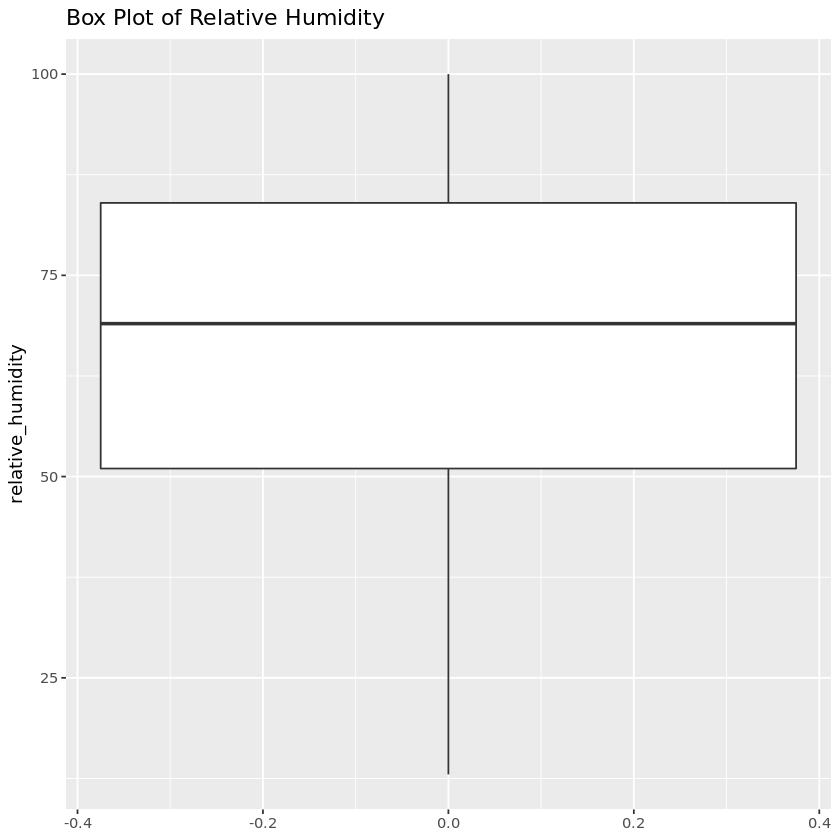

Warning message:
“Removed 1328 rows containing non-finite values (stat_boxplot).”

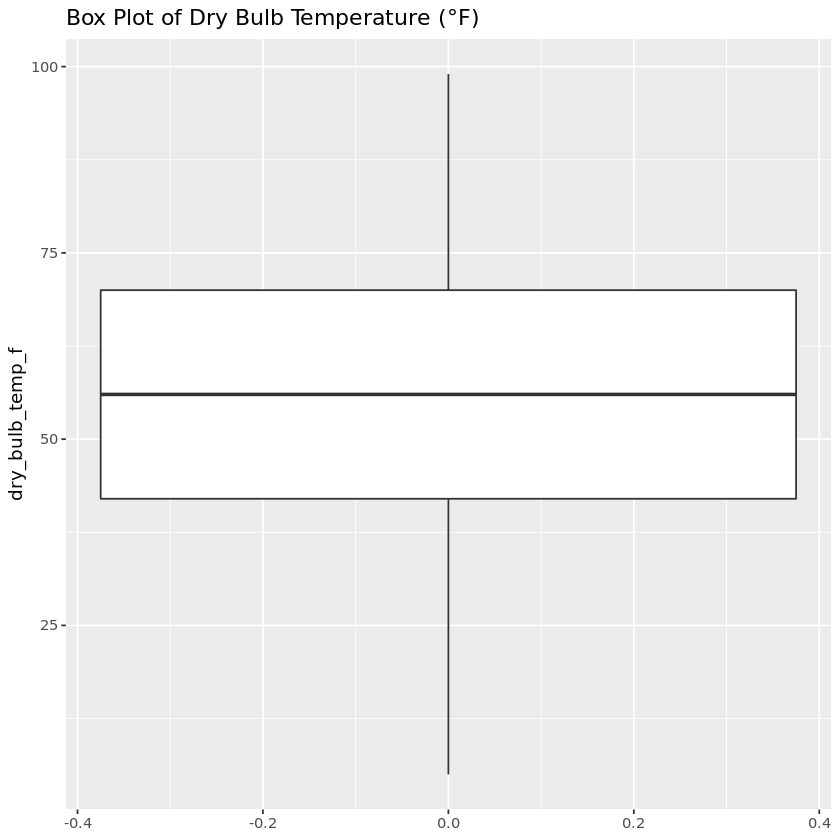

Warning message:
“Removed 132 rows containing non-finite values (stat_boxplot).”

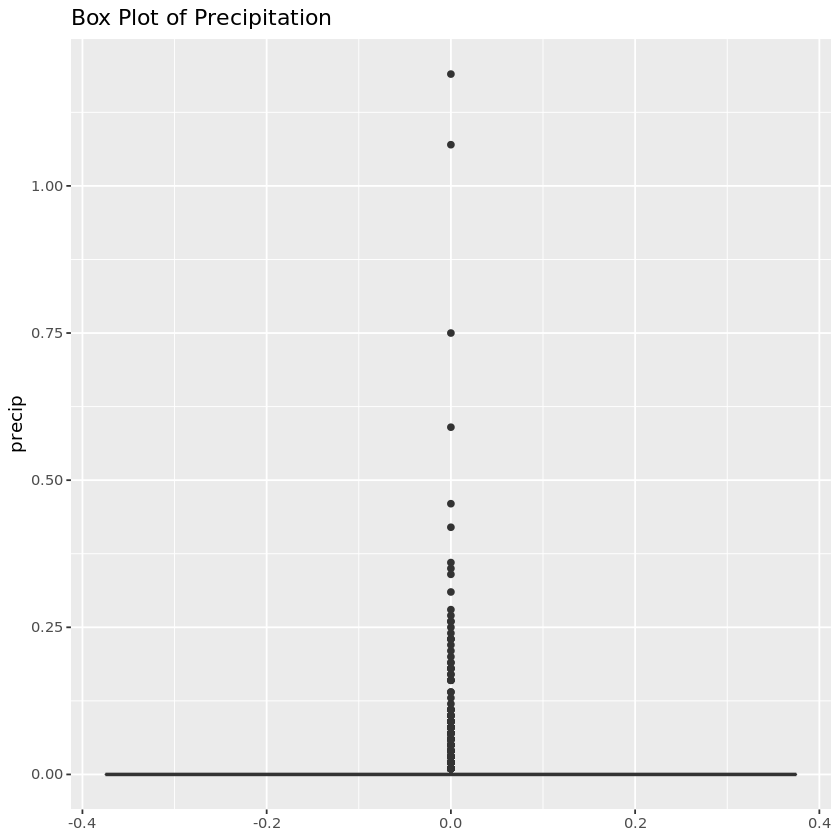

Warning message:
“Removed 133 rows containing non-finite values (stat_boxplot).”

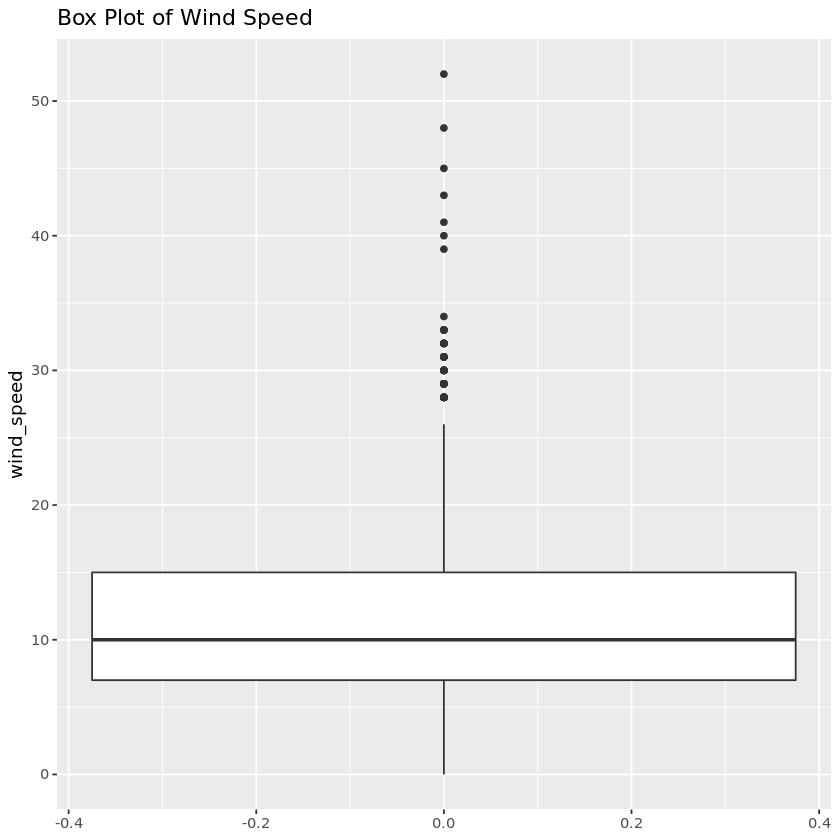

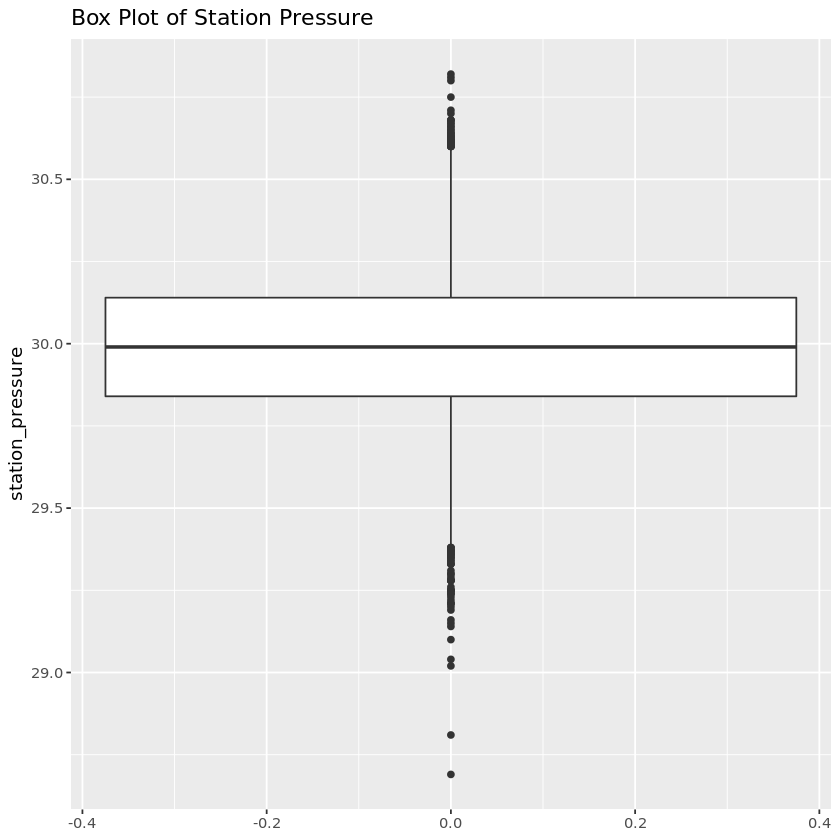

In [39]:
# OR manually draw histograms (or boxplots)

# Box plots
ggplot(train_data, aes(y = relative_humidity)) +
  geom_boxplot() +
  ggtitle("Box Plot of Relative Humidity")

ggplot(train_data, aes(y = dry_bulb_temp_f)) +
  geom_boxplot() +
  ggtitle("Box Plot of Dry Bulb Temperature (°F)")

ggplot(train_data, aes(y = precip)) +
  geom_boxplot() +
  ggtitle("Box Plot of Precipitation")

ggplot(train_data, aes(y = wind_speed)) +
  geom_boxplot() +
  ggtitle("Box Plot of Wind Speed")

ggplot(train_data, aes(y = station_pressure)) +
  geom_boxplot() +
  ggtitle("Box Plot of Station Pressure")

Warning message:
“Removed 127 rows containing non-finite values (stat_bin).”

Warning message:
“Removed 127 rows containing non-finite values (stat_bin).”

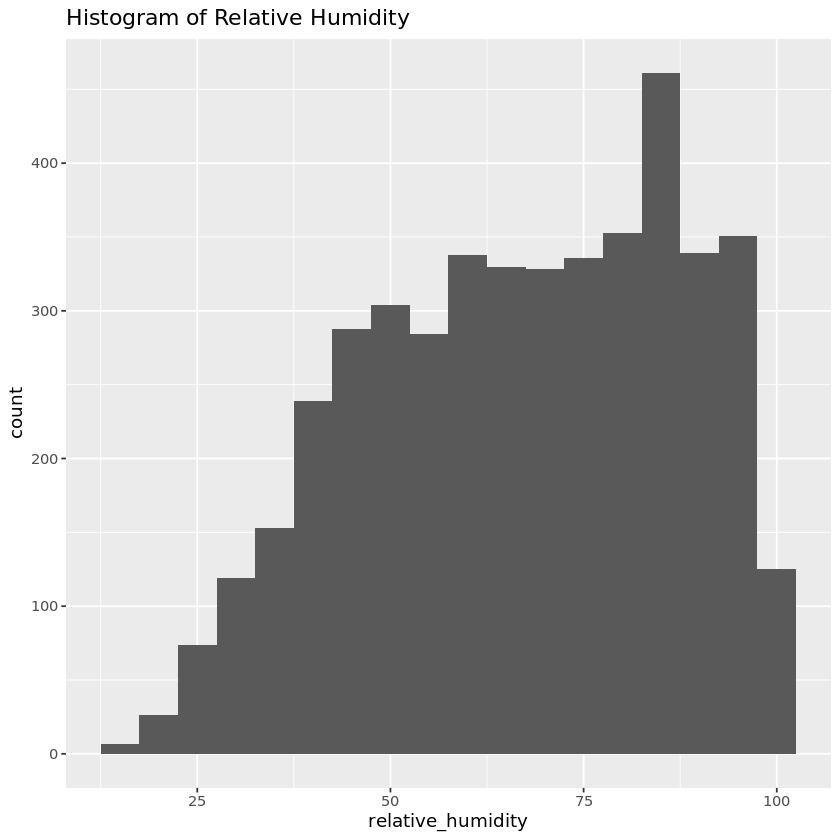

Warning message:
“Removed 1328 rows containing non-finite values (stat_bin).”

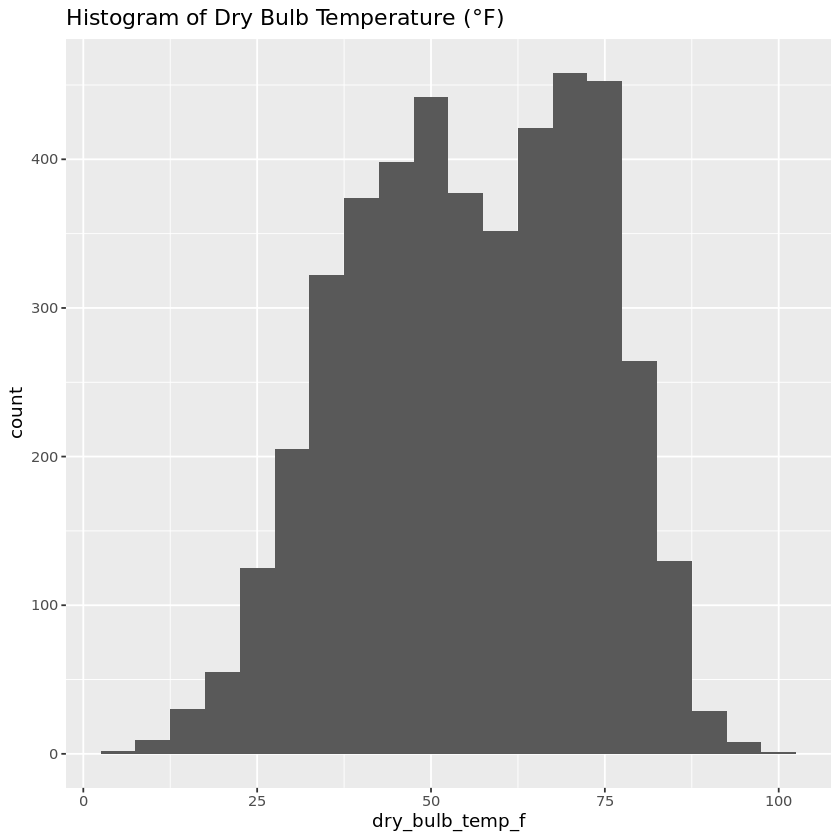

Warning message:
“Removed 132 rows containing non-finite values (stat_bin).”

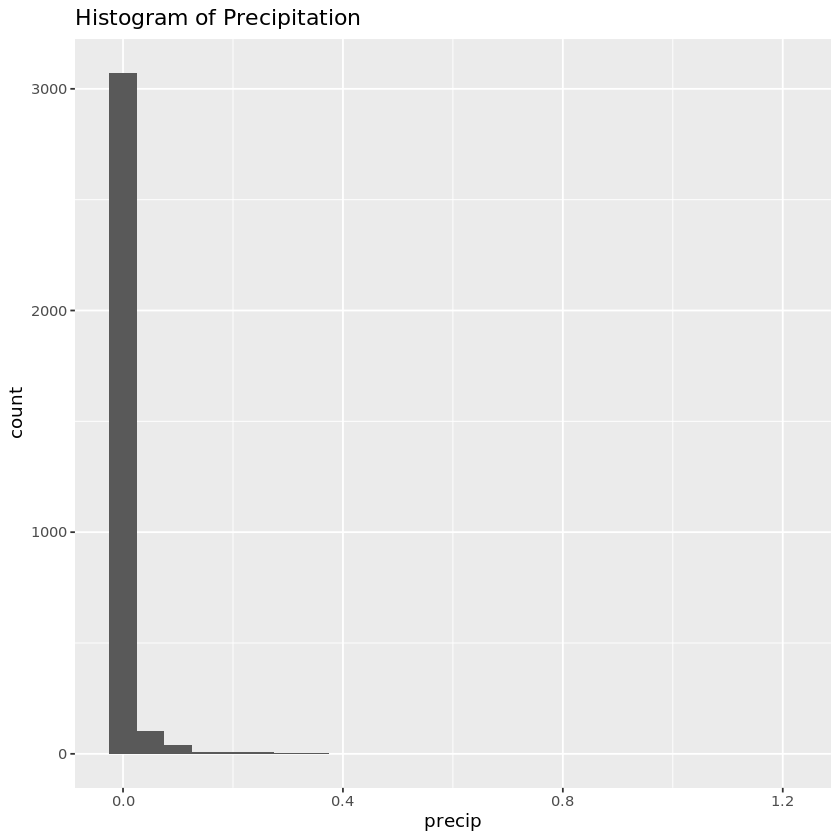

Warning message:
“Removed 133 rows containing non-finite values (stat_bin).”

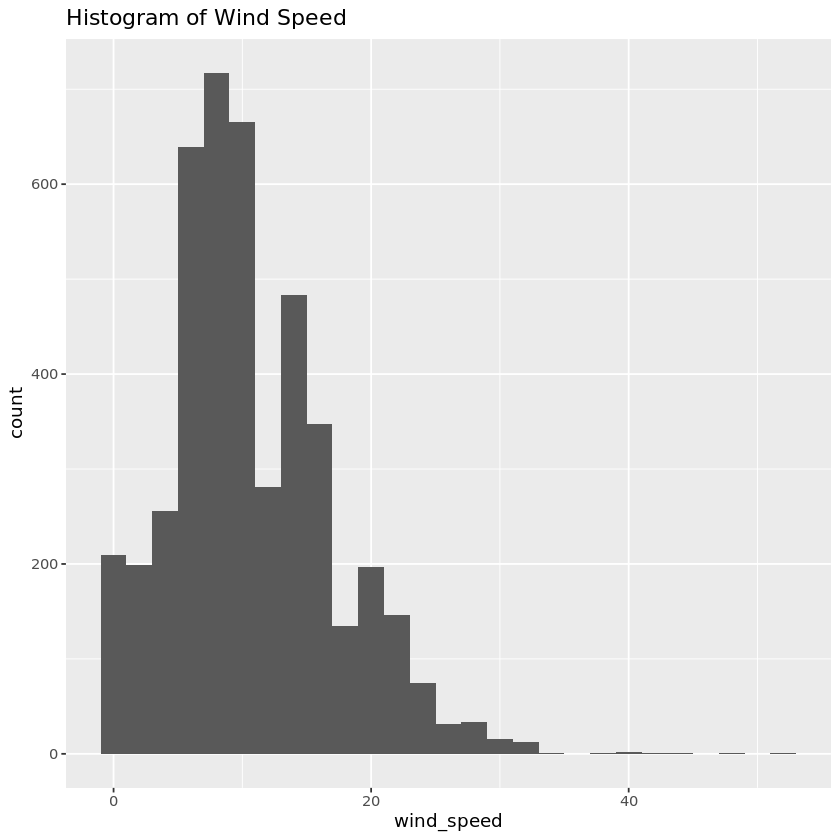

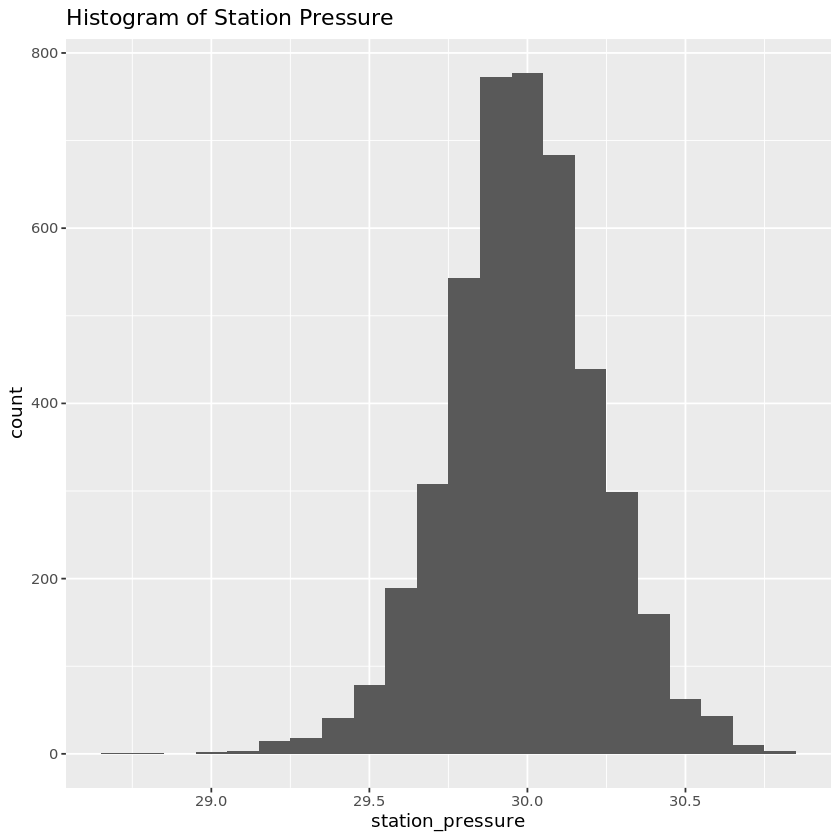

In [41]:
# OR manually draw histograms (or boxplots)

# Histograms
ggplot(train_data, aes(x = relative_humidity)) +
  geom_histogram(binwidth = 5) +
  ggtitle("Histogram of Relative Humidity")

ggplot(train_data, aes(x = dry_bulb_temp_f)) +
  geom_histogram(binwidth = 5) +
  ggtitle("Histogram of Dry Bulb Temperature (°F)")

ggplot(train_data, aes(x = precip)) +
  geom_histogram(binwidth = 0.05) +
  ggtitle("Histogram of Precipitation")

ggplot(train_data, aes(x = wind_speed)) +
  geom_histogram(binwidth = 2) +
  ggtitle("Histogram of Wind Speed")

ggplot(train_data, aes(x = station_pressure)) +
  geom_histogram(binwidth = 0.1) +
  ggtitle("Histogram of Station Pressure")

<a id="cell8"></a>
## 8. Linear Regression 
After exploring the dataset more, you are now ready to start creating models to predict the precipitation (`precip`).

Create simple linear regression models where `precip` is the response variable and each of `relative_humidity`, `dry_bulb_temp_f`,`wind_speed` or `station_pressure` will be a predictor variable, e.g. `precip ~ relative_humidity`, `precip ~ dry_bulb_temp_f`, etc. for a total of four simple models. 
Additionally, visualize each simple model with a scatter plot.


In [45]:
model_relative_humidity <- lm(precip ~ relative_humidity, data = train_data)

In [46]:
model_dry_bulb_temp <- lm(precip ~ dry_bulb_temp_f, data = train_data)

In [47]:
model_wind_speed <- lm(precip ~ wind_speed, data = train_data)

In [48]:
model_station_pressure <- lm(precip ~ station_pressure, data = train_data)

In [49]:
# Summarize the models
summary(model_relative_humidity)
summary(model_dry_bulb_temp)
summary(model_wind_speed)
summary(model_station_pressure)


Call:
lm(formula = precip ~ relative_humidity, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02102 -0.01125 -0.00488  0.00233  1.17068 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -2.144e-02  2.540e-03   -8.44   <2e-16 ***
relative_humidity  4.245e-04  3.681e-05   11.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04178 on 3252 degrees of freedom
  (1328 observations deleted due to missingness)
Multiple R-squared:  0.0393,	Adjusted R-squared:  0.039 
F-statistic:   133 on 1 and 3252 DF,  p-value: < 2.2e-16



Call:
lm(formula = precip ~ dry_bulb_temp_f, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00714 -0.00673 -0.00656 -0.00641  1.18352 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)      7.192e-03  2.514e-03   2.861  0.00425 **
dry_bulb_temp_f -1.043e-05  4.327e-05  -0.241  0.80955   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04262 on 3252 degrees of freedom
  (1328 observations deleted due to missingness)
Multiple R-squared:  1.786e-05,	Adjusted R-squared:  -0.0002896 
F-statistic: 0.05809 on 1 and 3252 DF,  p-value: 0.8096



Call:
lm(formula = precip ~ wind_speed, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02669 -0.00792 -0.00545 -0.00397  1.17813 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0010088  0.0015340   0.658    0.511    
wind_speed  0.0004938  0.0001181   4.180 2.99e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04251 on 3252 degrees of freedom
  (1328 observations deleted due to missingness)
Multiple R-squared:  0.005344,	Adjusted R-squared:  0.005038 
F-statistic: 17.47 on 1 and 3252 DF,  p-value: 2.994e-05



Call:
lm(formula = precip ~ station_pressure, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03534 -0.00906 -0.00575 -0.00178  1.17674 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.668715   0.091359   7.320 3.12e-13 ***
station_pressure -0.022077   0.003046  -7.248 5.27e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04229 on 3249 degrees of freedom
  (1331 observations deleted due to missingness)
Multiple R-squared:  0.01591,	Adjusted R-squared:  0.01561 
F-statistic: 52.53 on 1 and 3249 DF,  p-value: 5.271e-13


<a id="cell9"></a>
## 9. Improve the Model
Now, try improving the simple models you created in the previous section. 

Create at least two more models, each model should use at least one of the different techniques:
1. Add more features/predictors
2. Add regularization (L1, L2 or a mix)
3. Add a polynomial component

Also, for each of the models you create, check the model performance using the **training set** and a metric like MSE, RMSE, or R-squared.

Consider using `tidymodels` if you choose to add regularization and tune lambda.


[Task9-1] Multiple Linear Regression: Adding More Predictors

In [50]:
# Multiple linear regression with all predictors
model_multiple <- lm(precip ~ relative_humidity + dry_bulb_temp_f + wind_speed + station_pressure, data = train_data)

# Summary of the model
summary(model_multiple)

# Calculate RMSE for the training set
predictions_multiple <- predict(model_multiple, newdata = train_data)
rmse_multiple <- sqrt(mean((train_data$precip - predictions_multiple)^2))
cat("RMSE for Multiple Linear Regression:", rmse_multiple, "\n")


Call:
lm(formula = precip ~ relative_humidity + dry_bulb_temp_f + wind_speed + 
    station_pressure, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05505 -0.01104 -0.00448  0.00246  1.15983 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.157e-01  1.043e-01   2.067   0.0388 *  
relative_humidity  4.579e-04  3.992e-05  11.473  < 2e-16 ***
dry_bulb_temp_f   -3.253e-05  4.405e-05  -0.739   0.4602    
wind_speed         7.306e-04  1.316e-04   5.552 3.05e-08 ***
station_pressure  -8.196e-03  3.407e-03  -2.405   0.0162 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04144 on 3246 degrees of freedom
  (1331 observations deleted due to missingness)
Multiple R-squared:  0.05598,	Adjusted R-squared:  0.05482 
F-statistic: 48.12 on 4 and 3246 DF,  p-value: < 2.2e-16


RMSE for Multiple Linear Regression: NA 


[Task 9-2] Polynomial Regression: Adding a Quadratic Term

In [51]:
# Polynomial regression with quadratic term for relative_humidity
model_poly <- lm(precip ~ relative_humidity + I(relative_humidity^2) + dry_bulb_temp_f + wind_speed + station_pressure, data = train_data)

# Summary of the model
summary(model_poly)

# Calculate RMSE for the training set
predictions_poly <- predict(model_poly, newdata = train_data)
rmse_poly <- sqrt(mean((train_data$precip - predictions_poly)^2))
cat("RMSE for Polynomial Regression:", rmse_poly, "\n")


Call:
lm(formula = precip ~ relative_humidity + I(relative_humidity^2) + 
    dry_bulb_temp_f + wind_speed + station_pressure, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05038 -0.01013 -0.00175  0.00355  1.15074 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.805e-01  1.033e-01   1.747   0.0807 .  
relative_humidity      -1.507e-03  2.350e-04  -6.413 1.63e-10 ***
I(relative_humidity^2)  1.545e-05  1.822e-06   8.482  < 2e-16 ***
dry_bulb_temp_f        -1.134e-05  4.364e-05  -0.260   0.7951    
wind_speed              7.047e-04  1.302e-04   5.412 6.68e-08 ***
station_pressure       -5.174e-03  3.390e-03  -1.527   0.1270    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.041 on 3245 degrees of freedom
  (1331 observations deleted due to missingness)
Multiple R-squared:  0.07646,	Adjusted R-squared:  0.07504 
F-statistic: 53.73 on 5 and 3245 DF, 

RMSE for Polynomial Regression: NA 


In [52]:
# Compare R-squared values
cat("R-squared for Multiple Linear Regression:", summary(model_multiple)$r.squared, "\n")
cat("R-squared for Polynomial Regression:", summary(model_poly)$r.squared, "\n")

R-squared for Multiple Linear Regression: 0.05598137 
R-squared for Polynomial Regression: 0.07645855 


## Brief Conclusion: 

while the Polynomial Regression model shows a slight improvement over the Multiple Linear Regression model, both perform poorly in explaining the variation in precipitation. This suggests that more sophisticated modeling techniques or additional relevant predictors may be necessary to better understand and predict precipitation patterns in this dataset.

<a id="cell10"></a>
## 10. Find Best Model
Compare the regression metrics of each model from section 9 to find the best model overall. To do this, 

1. Evaluate the models on the **testing set** using at least one metric (like MSE, RMSE or R-squared).
2. After calculating the metrics on the testing set for each model, print them out in as a table to easily compare. You can use something like:
```
model_names <- c("model_1", "model_2", "model_3")
train_error <- c("model_1_value", "model_2_value", "model_3_value")
test_error <- c("model_1_value", "model_2_value", "model_3_value")
comparison_df <- data.frame(model_names, train_error, test_error)
```
3. Finally, from the comparison table you create, conclude which model performed the best.


In [53]:
model2_relative_humidity <- lm(precip ~ relative_humidity, data = test_data)
model2_dry_bulb_temp <- lm(precip ~ dry_bulb_temp_f, data = test_data)
model2_wind_speed <- lm(precip ~ wind_speed, data = test_data)
model2_station_pressure <- lm(precip ~ station_pressure, data = test_data)

In [54]:
summary(model2_relative_humidity)
summary(model2_dry_bulb_temp)
summary(model2_wind_speed)
summary(model2_station_pressure)


Call:
lm(formula = precip ~ relative_humidity, data = test_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.01828 -0.01063 -0.00480  0.00084  0.56624 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.649e-02  4.496e-03  -3.667 0.000261 ***
relative_humidity  3.477e-04  6.569e-05   5.292 1.56e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03715 on 811 degrees of freedom
  (332 observations deleted due to missingness)
Multiple R-squared:  0.03338,	Adjusted R-squared:  0.03219 
F-statistic: 28.01 on 1 and 811 DF,  p-value: 1.556e-07



Call:
lm(formula = precip ~ dry_bulb_temp_f, data = test_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.01292 -0.00870 -0.00588 -0.00324  0.57060 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)  
(Intercept)     -3.457e-03  4.392e-03  -0.787   0.4315  
dry_bulb_temp_f  1.761e-04  7.574e-05   2.326   0.0203 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03766 on 811 degrees of freedom
  (332 observations deleted due to missingness)
Multiple R-squared:  0.006624,	Adjusted R-squared:  0.0054 
F-statistic: 5.408 on 1 and 811 DF,  p-value: 0.02029



Call:
lm(formula = precip ~ wind_speed, data = test_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.01885 -0.00821 -0.00508 -0.00321  0.57241 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.0005496  0.0027567  -0.199  0.84202   
wind_speed   0.0006259  0.0002217   2.823  0.00487 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0376 on 811 degrees of freedom
  (332 observations deleted due to missingness)
Multiple R-squared:  0.009734,	Adjusted R-squared:  0.008513 
F-statistic: 7.972 on 1 and 811 DF,  p-value: 0.004868



Call:
lm(formula = precip ~ station_pressure, data = test_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.02470 -0.00971 -0.00581 -0.00041  0.56669 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.906149   0.179250   5.055 5.32e-07 ***
station_pressure -0.029981   0.005972  -5.020 6.35e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03723 on 810 degrees of freedom
  (333 observations deleted due to missingness)
Multiple R-squared:  0.03018,	Adjusted R-squared:  0.02898 
F-statistic:  25.2 on 1 and 810 DF,  p-value: 6.349e-07


In [55]:
# Multiple linear regression with all predictors
model_multiple <- lm(precip ~ relative_humidity + dry_bulb_temp_f + wind_speed + station_pressure, data = test_data)

# Summary of the model
summary(model_multiple)

# Calculate RMSE for the training set
predictions_multiple <- predict(model_multiple, newdata = test_data)
rmse_multiple <- sqrt(mean((test_data$precip - predictions_multiple)^2))
cat("RMSE for Multiple Linear Regression:", rmse_multiple, "\n")


Call:
lm(formula = precip ~ relative_humidity + dry_bulb_temp_f + wind_speed + 
    station_pressure, data = test_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03255 -0.01094 -0.00475  0.00199  0.55976 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.045e-01  2.063e-01   1.961 0.050208 .  
relative_humidity  3.455e-04  7.120e-05   4.853 1.46e-06 ***
dry_bulb_temp_f    8.282e-05  7.902e-05   1.048 0.294943    
wind_speed         8.005e-04  2.358e-04   3.395 0.000721 ***
station_pressure  -1.447e-02  6.746e-03  -2.144 0.032312 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03666 on 807 degrees of freedom
  (333 observations deleted due to missingness)
Multiple R-squared:  0.06334,	Adjusted R-squared:  0.0587 
F-statistic: 13.64 on 4 and 807 DF,  p-value: 9.052e-11


RMSE for Multiple Linear Regression: NA 


In [56]:
# Polynomial regression with quadratic term for relative_humidity
model_poly <- lm(precip ~ relative_humidity + I(relative_humidity^2) + dry_bulb_temp_f + wind_speed + station_pressure, data = test_data)

# Summary of the model
summary(model_poly)

# Calculate RMSE for the training set
predictions_poly <- predict(model_poly, newdata = test_data)
rmse_poly <- sqrt(mean((test_data$precip - predictions_poly)^2))
cat("RMSE for Polynomial Regression:", rmse_poly, "\n")


Call:
lm(formula = precip ~ relative_humidity + I(relative_humidity^2) + 
    dry_bulb_temp_f + wind_speed + station_pressure, data = test_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.03573 -0.01025 -0.00342  0.00240  0.55873 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.707e-01  2.062e-01   1.797 0.072660 .  
relative_humidity      -6.409e-04  4.301e-04  -1.490 0.136626    
I(relative_humidity^2)  7.819e-06  3.363e-06   2.325 0.020313 *  
dry_bulb_temp_f         8.993e-05  7.887e-05   1.140 0.254527    
wind_speed              8.105e-04  2.352e-04   3.446 0.000598 ***
station_pressure       -1.242e-02  6.785e-03  -1.831 0.067523 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03656 on 806 degrees of freedom
  (333 observations deleted due to missingness)
Multiple R-squared:  0.06958,	Adjusted R-squared:  0.06381 
F-statistic: 12.06 on 5 and 806 DF,  p

RMSE for Polynomial Regression: NA 


## Conclusion

>Coefficient Significance

Relative Humidity: Highly significant (p < 0.001) with a positive effect on precipitation.

Wind Speed: Highly significant (p < 0.001) with a positive effect on precipitation.

Station Pressure: Significant (p < 0.05) with a negative effect on precipitation.

Dry Bulb Temperature: Not significant (p > 0.05), suggesting it may not be a good predictor of precipitation in this model.

>Model Significance

The overall model is statistically significant, as indicated by the F-statistic of 13.64 with a p-value of 9.052e-11. This extremely low p-value (< 0.05) suggests that the model as a whole is better at predicting precipitation than a model with no predictors.

>Model Fit

The Multiple R-squared value is 0.06334, and the Adjusted R-squared is 0.0587. These values indicate that the model explains only about 6% of the variance in precipitation, which is quite low. This suggests that while the model is statistically significant, its predictive power is limited.

>Conclusion

1) The model is statistically significant, but its predictive power is weak.

2) Relative humidity and wind speed are the strongest predictors of precipitation in this model.

3) The model's low R-squared value suggests that other important factors influencing precipitation may not be included in the model.

4) The presence of missing data and possible outliers might be affecting the model's performance.
Further investigation into other potential predictors, handling of missing data, and examination of outliers could potentially improve the model.

5) It's worth noting that the RMSE (Root Mean Square Error) is reported as NA, which is unusual. Typically, a lower RMSE indicates better model performance. The absence of this value makes it difficult to assess the model's predictive accuracy in the original units of precipitation.

## Author(s)

<h4> Yiwen Li </h4>

## Contributions

<h4> Tiffany Zhu </h4>

## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
